<a href="https://colab.research.google.com/github/Adam129511/sieci2/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nagłówek

In [4]:
print('hello')

hello


##Funkcje Aktywacji
### ReLU funkcja
$f(x) = max(x,0)$

In [5]:
import numpy as np  #biblioteka do obliczeń numerycznych
import matplotlib.pyplot as plt #generowanie wykresów
import seaborn as sns #biblioteka do poprawy czytelnosci wykresow
sns.set()

In [6]:
def max_relu(x): #Funkcja aktywacji ReLU
    return max(x,0)

In [7]:
for i in [-10, -5, 0, 5, 10]:
    print(max_relu(i))


0
0
0
5
10


Text(0.5, 1.0, 'ReLU Function')

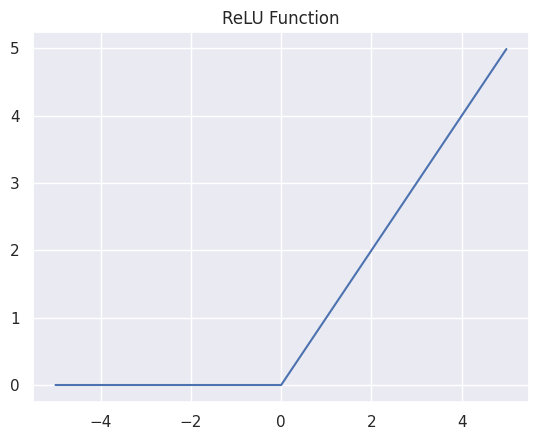

In [8]:
data = np.arange(-5, 5, 0.01)
max_relu_data = [max_relu(x) for x in data]
#max_relu_data
plt.plot(data, max_relu_data)
plt.title('ReLU Function')

##Funkcja Sigmoid
### $f(X) = \frac{1}{1+e^{-x}}$


In [9]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [10]:
for i in [-5, -3, -1, 0, 1, 3, 5]:
    print(sigmoid(i))

0.0066928509242848554
0.04742587317756678
0.2689414213699951
0.5
0.7310585786300049
0.9525741268224334
0.9933071490757153


Text(0.5, 1.0, 'Sigmoid Function')

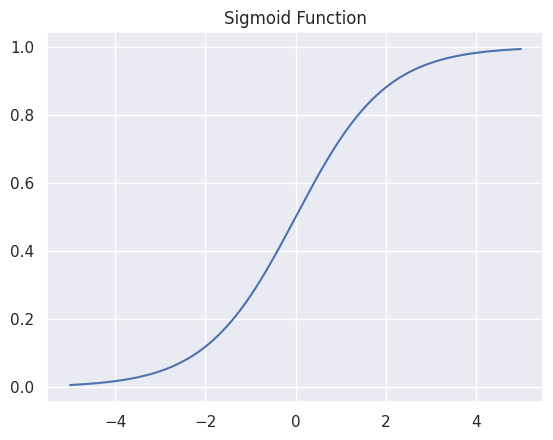

In [11]:
sigmoid_data = [sigmoid(x) for x in data]

plt.plot(data, sigmoid_data)
plt.title('Sigmoid Function')

##Funkcja Softmax
### $S(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{i} e ^ {y_j}}$
#Zwraca prawdopodobieństwo otrzymania jakiejś klasy


In [12]:
data = np.random.randn(3, 5)
data
import pandas as pd
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,0.138654,-0.910625,-0.232898,-0.724825,1.258355
1,-0.213642,0.155916,0.225439,0.475891,0.487049
2,-1.241543,-0.838084,-0.832525,-0.511461,0.030137


To co mamy powyżej zakładam że to już wartości na wyjściu z ostatniej warstwy ukrytej


In [13]:
np.exp(df)

,0,1,2,3,4
0,1.148726,0.402273,0.792235,0.484409,3.519627
1,0.807637,1.168728,1.252873,1.609447,1.627506
2,0.288938,0.432539,0.434950,0.599619,1.030596


In [14]:
np.sum(np.exp(df)) #Sumuje dla danej kolumny wszystkie wiersze tudzież klasy

0    2.245301
1    2.003539
2    2.480057
3    2.693475
4    6.177730
dtype: float64

In [15]:
res = np.exp(df) / np.sum(np.exp(df))
res

,0,1,2,3,4
0,0.511613,0.200781,0.319442,0.179845,0.569728
1,0.359701,0.583332,0.505179,0.597536,0.263447
2,0.128686,0.215887,0.175379,0.222619,0.166824


In [16]:
np.sum(res)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

Text(0.5, 1.0, 'Softmax Function')

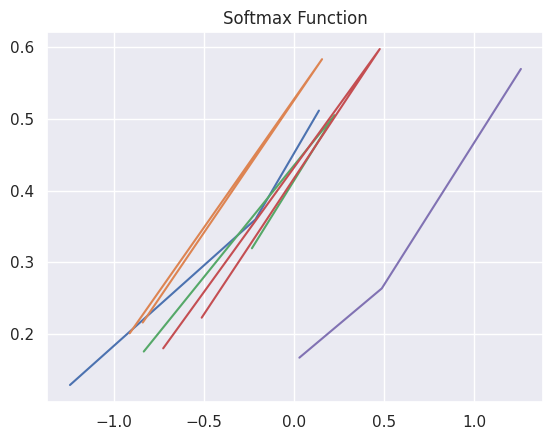

In [17]:
plt.plot(df, res)
plt.title('Softmax Function')

##Tangens hiperboliczny
### $tanh(x) = \frac{e^{x} - e^{-x}}{ e ^ {x} + e^{-x}}$

In [23]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [24]:
for i in [-2, -1, 0, 1, 2]:
    print(tanh(i))


-0.964027580075817
-0.7615941559557649
0.0
0.7615941559557649
0.964027580075817


Text(0.5, 1.0, 'tangens hiperboliczny')

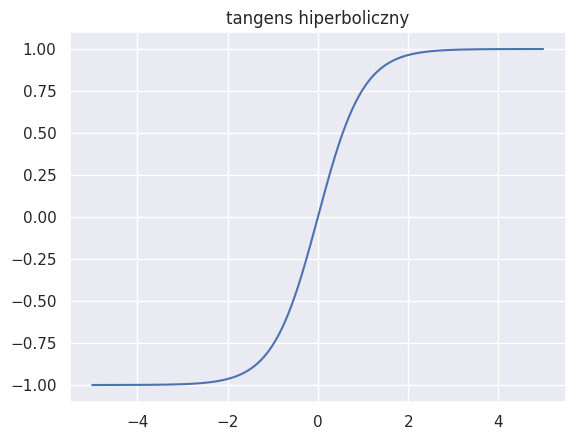

In [25]:
data = np.arange(-5, 5, 0.01)
tanh_data = [tanh(x) for x in data]
plt.plot(data, tanh_data)
plt.title('tangens hiperboliczny')


##Funkcje koszty/straty/celu (w zalezności od nomenklatury)
#Dokładność klasyfikacji - Accuracy
#$Accuracy = \frac{correct \ predictions}{total\ predictions} *100$


In [3]:
import numpy as np #importuje bo środowisko się odłączyło

y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1])

def accuracy(y_true, y_pred):
    correct = 0 #licznik, zliczajacy poprawne wartości
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1 #jeśli sie zgadza to zwiększamy licznik o 1
    return correct / len(y_true) *100


In [15]:
accuracy(y_true, y_pred)

83.33333333333334

**Entropia rozkładu prawdopodobieństwa**
#$Entropy= {-\sum_{i}p_{i}* log(p_{i})}$
gdzie $p_{i}$ to prawdopodobieństwo zajścia i - tego zdarzenia. Entropia charakteryzuje możliwość oddawania informacji przez żródło. Inaczej jest to miara nieokreśloności/niepewności. Średnie zdziwienie (wartość oczekiwana zdziwienia)

#Entropia też jako miara odległości rzeczywistych od przewdywanych


In [31]:
def entropy(labels, base = None): #labels - dane, base - podstawa logarytmu. None to nie to samo co zero
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0
    value, counts = np.unique(labels, return_counts= True)#value - wartości unikalne, counts - liczba wartości unikalnych

    probs = counts/n_labels # prawdopobienśtwo counts na liczbę danych

    n_classes = np.count_nonzero(probs)


    if n_classes <= 1:
        return 0

    ent = 0.

    base = np.e if base is None else base
    #for i in probs:
     #   ent -= i * log(i, base)
    #return ent
    return -np.sum(probs * np.log(probs))

labels = [1,3,5,2,3,5,3,2,1,3,4,5]
entropy(labels)


1.5171063970610277

**Binarna entropia krzyżowa**
#$Binary\ CrossEntropy= {-y_{true}* log(y_{pred}) - (1 - y_{true})*log(1-y_{pred})}$

In [4]:
def binary_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 0.0000001, 1-0.0000001) #żeby nie było logarytmu z zera zmiana 0 na 0.000001 natomiast 1 zamienia na 1-0.000001
    return -y_true * np.log(y_pred) - (1 - y_true) * np.log(1- y_pred)

In [6]:
y_true = np.array([1, 0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 0, 1, 1, 0, 1, 1])

binary_crossentropy(y_true, y_pred)

array([1.61180957e+01, 1.00000005e-07, 1.00000005e-07, 1.00000005e-07,
       1.00000005e-07, 1.00000005e-07, 1.61180957e+01])

**Kategoryczna Entropia Krzyżowa**
#$Categorical \ CrossEntropy= {-\sum_{i}y_{true}* log(y_{pred})}$

In [5]:
def categorical_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 0.0000001, 1-0.0000001) #żeby nie było logarytmu z zera zmiana 0 na 0.000001 natomiast 1 zamienia na 1-0.000001
    return -np.sum(y_true * np.log(y_pred))

In [32]:
y_true = np.array([1, 0, 0, 0, 0])
y_pred = np.array([0.4, 0.3, 0.05, 0.05, 0.2])
categorical_crossentropy(y_true, y_pred)

0.916290731874155

In [6]:
y_true = np.array([1, 0, 0, 0, 0])
y_pred = np.array([0.98, 0.01, 0.0, 0.05, 0.01])
categorical_crossentropy(y_true, y_pred)

0.020202707317519466

Wniosek im mniejsza wartość entropii krzyżowej tym lepiej. Ponieważ jest to funkcja straty im mniejsza strata tym lepiej.

#Funkcja Optymalizacji
##-Algorytm stochastycznego spadku
### $L(w) = w^{2} - 4w$
### $\frac{dL}{dw} = 2w - 4$

In [1]:
import matplotlib.pyplot as plt # do generowania wykresów
import numpy as np # do danych liczbowych
import seaborn as sns # nakładka na matplotlib
sns.set()

Text(0.5, 1.0, 'Loss function')

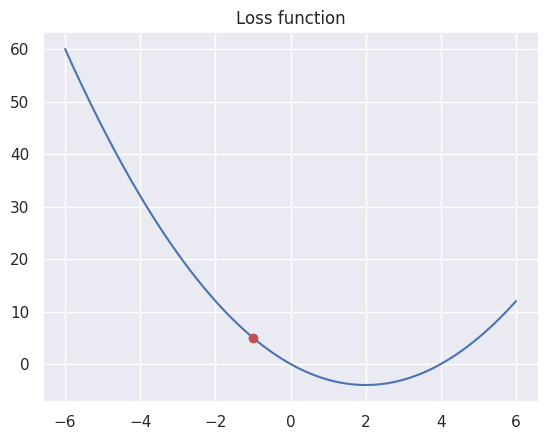

In [7]:
w = np.arange(-6, 6, 0.001)
loss = w**2 - 4*w
point = -1
plt.plot(w,loss)
plt.plot(point, point**2 - 4*point, 'ro')
plt.title("Loss function")

In [3]:
def gradient_descent(df=lambda w: 2*w -4, learning_rate = 0.01, w_0 = -5, max_iters = 10000, precision = 0.00001):

    iters = 0 #licznik iteracji
    previous_step_size = 1 #kontrola wartości kroku kolejnego spadku
    weights = []
    while (previous_step_size > precision and  iters < max_iters):
        w_prev = w_0
        w_0 = w_0 - learning_rate * df(w_prev)
        previous_step_size = abs(w_0 - w_prev)
        iters += 1
        weights.append(w_0)
        print('iteracja #{}: obecny punkt: {} '.format(iters, w_0))

    print('Minimum globalne: {}'.format(w_0))
    return weights

In [4]:
weights = gradient_descent(learning_rate=0.1)

iteracja #1: obecny punkt: -3.5999999999999996 
iteracja #2: obecny punkt: -2.4799999999999995 
iteracja #3: obecny punkt: -1.5839999999999996 
iteracja #4: obecny punkt: -0.8671999999999996 
iteracja #5: obecny punkt: -0.2937599999999997 
iteracja #6: obecny punkt: 0.1649920000000003 
iteracja #7: obecny punkt: 0.5319936000000003 
iteracja #8: obecny punkt: 0.8255948800000003 
iteracja #9: obecny punkt: 1.0604759040000002 
iteracja #10: obecny punkt: 1.2483807232000002 
iteracja #11: obecny punkt: 1.39870457856 
iteracja #12: obecny punkt: 1.518963662848 
iteracja #13: obecny punkt: 1.6151709302784 
iteracja #14: obecny punkt: 1.69213674422272 
iteracja #15: obecny punkt: 1.753709395378176 
iteracja #16: obecny punkt: 1.8029675163025407 
iteracja #17: obecny punkt: 1.8423740130420325 
iteracja #18: obecny punkt: 1.873899210433626 
iteracja #19: obecny punkt: 1.8991193683469008 
iteracja #20: obecny punkt: 1.9192954946775207 
iteracja #21: obecny punkt: 1.9354363957420166 
iteracja #22

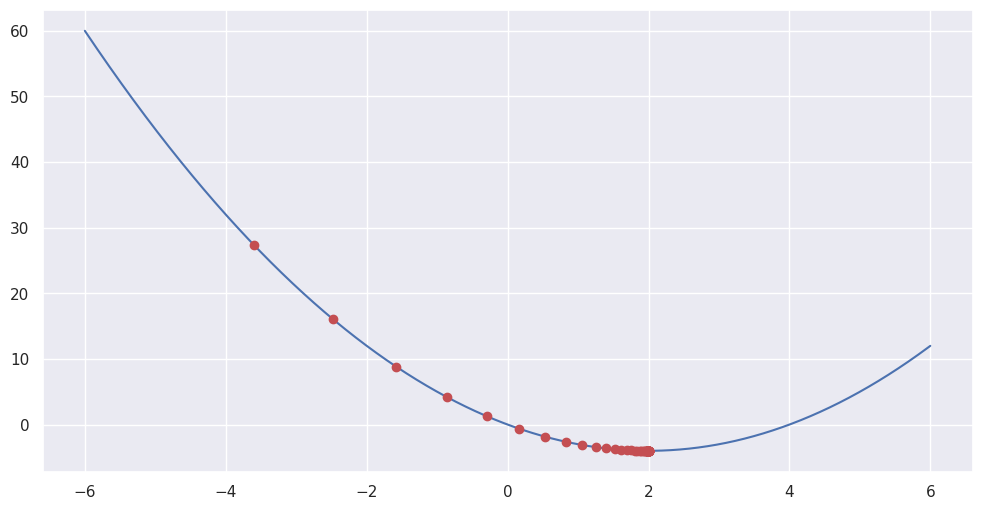

In [12]:
plt.figure(figsize = (12,6))#szerokość wyświetlanego okna
plt.plot(w, loss)
for weight in weights:
    plt.plot(weight, weight**2 - 4*weight, 'ro')



Implementacja sieci neuronowej

In [4]:
import numpy as np

np.random.seed(0)
X = np.array([[1.0, 0.7]])
y_true = np.array([1.80])



In [12]:
def initialize_parameters(n_x, n_h, n_y): #funkcja do generacji wag
    W1 = np.random.randn(n_h, n_x)

    W2 = np.random.randn(n_h, n_y)
    return W1, W2
def forward_propagation(X, W1, W2):
    H = np.dot(X, W1)#Iloczyn macierzowy
    y_pred = np.dot(H,W2)
    return H, y_pred

def calculate_error(y_true, y_pred):
    return y_pred-y_true

def back_propagation(X, W1, W2, learning_rate=0.01, iters=1000, precision = 0.0000001):

    H, y_pred = forward_propagation(X, W1, W2)

    for i in range(iters):
        error = calculate_error(y_true, y_pred)
        W2 = W2 - learning_rate * error * H.T
        W1 = W1 - learning_rate *error * X.T * W2.T

        _, y_pred = forward_propagation(X, W1, W2)
        print('Iter{}, y_pred:{},error:{}'.format(i,y_pred[0][0],calculate_error(y_true, y_pred)[0][0]))
        if abs(error)<precision:
            break
    return W1, W2

def predict(X, W1, W2):
    _, y_pred = forward_propagation(X, W1, W2)
    return y_pred

def build_model():

    W1, W2 = initialize_parameters(2, 2, 1) #inicjalizacja wag

    W1, W2 = back_propagation(X, W1, W2)

    model = {'W1':W1, 'W2': W2}
    return model







In [6]:
W1, W2 = initialize_parameters(2, 2, 1)
W1, W2

(array([[1.76405235, 0.40015721],
        [0.97873798, 2.2408932 ]]),
 array([[ 1.86755799],
        [-0.97727788]]))

In [13]:
build_model()

Iter0, y_pred:1.5410861507126434,error:-0.2589138492873566
Iter1, y_pred:1.5532396893766398,error:-0.24676031062336024
Iter2, y_pred:1.564865233572255,error:-0.235134766427745
Iter3, y_pred:1.5759817355010062,error:-0.22401826449899387
Iter4, y_pred:1.5866078489167978,error:-0.2133921510832022
Iter5, y_pred:1.5967618926085767,error:-0.20323810739142334
Iter6, y_pred:1.6064618191303381,error:-0.1935381808696619
Iter7, y_pred:1.6157251883791008,error:-0.1842748116208992
Iter8, y_pred:1.6245691456327742,error:-0.17543085436722583
Iter9, y_pred:1.633010403673513,error:-0.16698959632648713
Iter10, y_pred:1.6410652286376897,error:-0.15893477136231038
Iter11, y_pred:1.6487494292505367,error:-0.15125057074946335
Iter12, y_pred:1.65607834912135,error:-0.14392165087865005
Iter13, y_pred:1.663066861793582,error:-0.13693313820641806
Iter14, y_pred:1.6697293682628795,error:-0.1302706317371205
Iter15, y_pred:1.6760797966948147,error:-0.12392020330518538
Iter16, y_pred:1.6821316040926144,error:-0.117

{'W1': array([[0.84626841, 0.11077631],
        [0.50352471, 0.32604523]]),
 'W2': array([[ 1.55398596],
        [-0.18530111]])}